# Plotting a global tomography  model

Let's look at a slice from a global mantle shear-velocity tomography model. I have provided a copy of the whole-mantle anisotropic model S362ANI+M by Moulik and Ekström (2014).

Behind the scenes, I have installed the following packages to make this work:
 - netcdf4
 - numpy
 - cartopy
 - matplotlib


In [32]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [33]:
tomography_file = 'S362ANI+M_kmps.nc'
from netCDF4 import Dataset
file = Dataset(tomography_file, "r", format="NETCDF4")

In [34]:
# print out the metadata associated with the tomography model:
file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: An anisotropic shear velocity model of the Earth's mantle using normal modes, body waves, surface waves and long-period waveforms
    id: S362ANI+M_kmps
    summary: We use normal-mode splitting functions in addition to surface-wave 
phase anomalies, body-wave travel times and long-period waveforms to construct 
a three-dimensional model of anisotropic shear-wave velocity in the Earth's mantle.

    reference: Moulik and Ekstrom (2014)
    references: http://ds.iris.edu/ds/products/emc-references
    keywords: seismic, tomography, shear wave, s wave, elsatic waveform, voigt 
    Conventions: CF-1.0
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    creator_name: IRIS EMC
    creator_url: http://ds.iris.edu/ds/products/emc/
    creator_email: product@iris.edu
    institution: IRIS DMC
    acknowledgment: Model was provided by Raj Moulik, 
Lamont-Doherty Earth Observatory

In [64]:
# read the variables from the netcdf files by name:
lon = file.variables['longitude']
lat = file.variables['latitude']
depth = file.variables['depth']
vs = file.variables['vs']

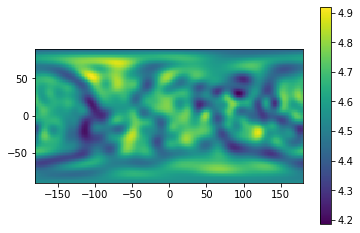

In [65]:
# extract the first slice from the vs array and make a simple plot with no map projection:
slice_index=0
vs_slice = vs[slice_index,:,:]
plt.figure()
plt.pcolor(lon,lat,vs_slice)
plt.colorbar()
plt.axis('scaled') # look at the documentation to find out what this doese
plt.show()

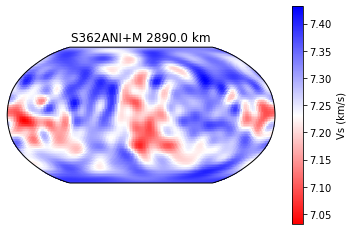

In [79]:
# make a nicer plot.
slice_indes=1;
vs_slice = vs[slice_index,:,:]
# load the blue-white-red colormap
cmap = plt.get_cmap('bwr').reversed()
proj = ccrs.Robinson()
fig = plt.figure()
fig.add_subplot(1,1,1,projection=proj)
plt.pcolor(lon,lat,vs_slice,transform=ccrs.PlateCarree(),cmap=cmap)
plt.colorbar(label='Vs (km/s)')
plt.title('S362ANI+M {:.1f} km'.format(depth[slice_index]))
plt.show()

In [ ]:
# make the plot a little bit prettier by adding coastlines and gridlines. Just for fun, let's also look at the lowermost mantle instead of lithosphere
slice_index=-1 # pick the last slice in the model
vs_slice = vs[slice_index,:,:]

proj = ccrs.Robinson()
fig = plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1,projection=proj)
p=ax.pcolor(lon,lat,vs_slice,transform=ccrs.PlateCarree(),cmap=cmap)
plt.colorbar(p,label='Vs (km/s)')
ax.coastlines()
plt.title('S362ANI+M {:.1f} km'.format(depth[slice_index]))

gl=ax.gridlines(color='k',linewidth=0.5)
plt.show()